In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load dataset
df1 = pd.read_csv('/content/drive/MyDrive/Bank_Data_Set/bank_transactions.csv')


In [ ]:
df1 = df1.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'})

In [ ]:
# Display the number of null values in each column before cleaning
print("Null values before cleaning:")
print(df1.isnull().sum())

Null values before cleaning:
TransactionID            0
CustomerID               0
CustomerDOB           3397
CustGender            1100
CustLocation           151
CustAccountBalance    2369
TransactionDate          0
TransactionTime          0
TransactionAmount        0
dtype: int64


In [ ]:
df1.isnull().sum() / len(df1) * 100

df2 = df1.dropna(subset = ['CustomerDOB'])

df2['CustGender'] = df2['CustGender'].fillna(df2['CustGender'].mode()[0])

df2['CustLocation'] = df2['CustLocation'].fillna(df2['CustLocation'].mode()[0])

df2['CustAccountBalance'] = df2['CustAccountBalance'].fillna(df2['CustAccountBalance'].median())

<ipython-input-9-587e5c46dd91>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CustGender'] = df2['CustGender'].fillna(df2['CustGender'].mode()[0])
<ipython-input-9-587e5c46dd91>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CustLocation'] = df2['CustLocation'].fillna(df2['CustLocation'].mode()[0])
<ipython-input-9-587e5c46dd91>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
print("\nNull values after cleaning:")
print(df2.isnull().sum())


Null values after cleaning:
TransactionID         0
CustomerID            0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
dtype: int64


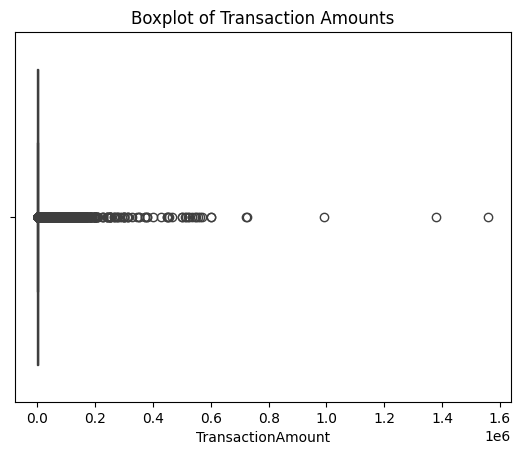

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library

# Boxplot Before Cleaning (Before removing outliers)
sns.boxplot(data = df2, x = 'TransactionAmount')

plt.title('Boxplot of Transaction Amounts')
plt.show()

**Removing Invalid Transaction Amounts**

In [ ]:
# Step 1: Apply IQR method to detect and remove outliers
Q1 = df2['TransactionAmount'].quantile(0.25)
Q3 = df2['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


-1400.0
2760.0


In [ ]:
#Remove transaction amounts outside the IQR range
df3 = df2[(df2['TransactionAmount'] > lower_bound) & (df2['TransactionAmount'] < upper_bound)]

# Display the cleaned dataset size
print(f"Dataset size after removing invalid transaction amounts: {df3.shape}")


Dataset size after removing invalid transaction amounts: (933919, 9)


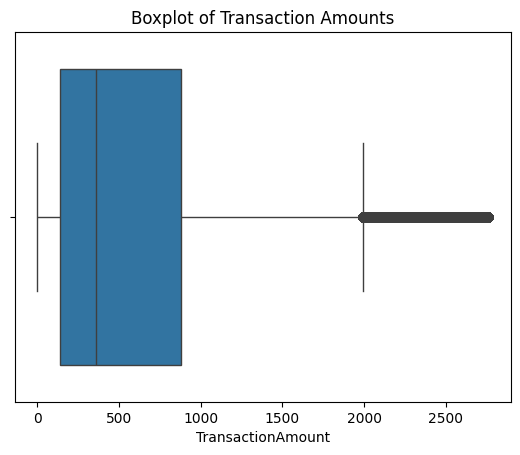

In [ ]:
# Boxplot After Cleaning (After removing outliers)
sns.boxplot(data = df3, x = 'TransactionAmount')
plt.title('Boxplot of Transaction Amounts')
plt.show()

**Removing Invalid Age Values**

In [ ]:
df3['CustYearOfBirth'] = pd.DatetimeIndex(df3['CustomerDOB']).year


<ipython-input-17-0b561a2693ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['CustYearOfBirth'] = pd.DatetimeIndex(df3['CustomerDOB']).year


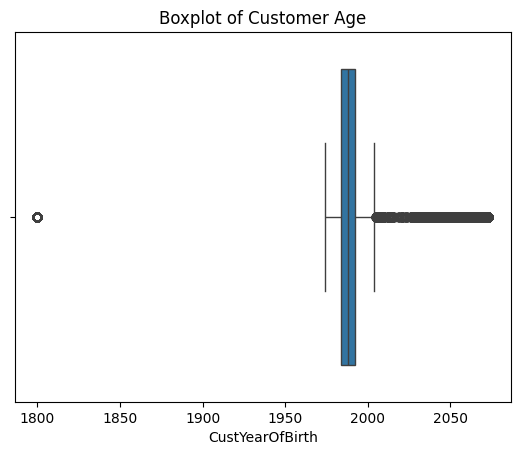

In [ ]:
# Boxplot Before Cleaning (Before removing outliers)
sns.boxplot(data = df3, x = 'CustYearOfBirth')

plt.title('Boxplot of Customer Age')
plt.show()

In [ ]:
# Step 1: Apply IQR method to detect and remove outliers
Q1 = df3['CustYearOfBirth'].quantile(0.25)
Q3 = df3['CustYearOfBirth'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

1972.0
2004.0


In [ ]:
#Remove transaction amounts outside the IQR range
df4 = df3[(df3['CustYearOfBirth'] > lower_bound) & (df3['CustYearOfBirth'] < upper_bound)]

# Display the cleaned dataset size
print(f"Dataset size after removing invalid transaction amounts: {df4.shape}")

Dataset size after removing invalid transaction amounts: (814254, 10)


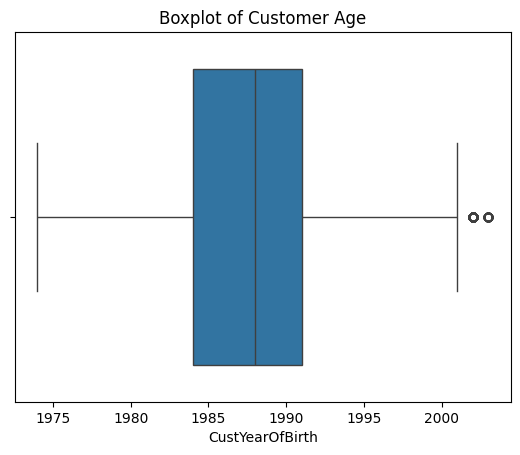

In [ ]:
# Boxplot After Cleaning (Before removing outliers)
sns.boxplot(data = df4, x = 'CustYearOfBirth')

plt.title('Boxplot of Customer Age')
plt.show()

Top 5 Locations with Maximum Number of Transactions:
CustLocation
MUMBAI       78933
BANGALORE    66124
NEW DELHI    59882
GURGAON      58002
DELHI        55728
Name: count, dtype: int64


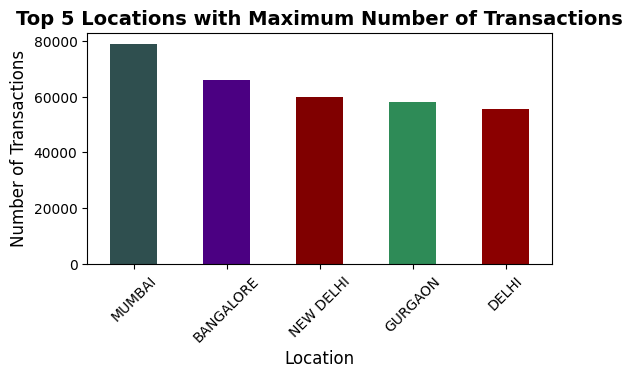

In [ ]:
# Display the top 5 locations with the maximum number of transactions
top_locations = df4['CustLocation'].value_counts().head(5)

# Display the result
print("Top 5 Locations with Maximum Number of Transactions:")
print(top_locations)

# Define a list of colors
d_colors = ['#2F4F4F', '#4B0082', '#800000', '#2E8B57', '#8B0000']  # Dark colors

# Create a bar plot for the top 5 locations
top_locations.plot(kind='bar', color=d_colors, figsize=(6, 3))

# Title and labels for the plot
plt.title('Top 5 Locations with Maximum Number of Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)

plt.show()


In [ ]:
df5 = df4.copy()
df5.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,CustYearOfBirth
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,1994
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,1996
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,1988
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.0,1992
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.0,1982


In [ ]:
df5['TransactionDate'] = pd.to_datetime(df5['TransactionDate'], errors='coerce')

<ipython-input-25-6d72b3ebe8b8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df5['TransactionDate'] = pd.to_datetime(df5['TransactionDate'], errors='coerce')


**RFM Analysis**

In [ ]:
import sqlite3

# connect to database
conn = sqlite3.connect("RFMBankTransaction_DB")
cur = conn.cursor()

In [ ]:
# load CRM data into the RFMBankTransactionDB database
df5.to_sql("data", conn,if_exists='replace',index=False)

814254

In [ ]:
# CHECK IF DATA INSERTED INTO data/RFMBankTransactionDB
df5 = pd.read_sql('SELECT * FROM data', conn)
df5



,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,CustYearOfBirth
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08 00:00:00,143207,25.0,1994
1,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08 00:00:00,142712,459.0,1996
2,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08 00:00:00,181156,1762.5,1988
3,T7,C7126560,26/1/92,F,MUMBAI,973.46,2016-02-08 00:00:00,173806,566.0,1992
4,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2016-02-08 00:00:00,170537,148.0,1982
...,...,...,...,...,...,...,...,...,...,...
814249,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2016-09-18 00:00:00,184824,799.0,1990
814250,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2016-09-18 00:00:00,183734,460.0,1992
814251,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2016-09-18 00:00:00,183313,770.0,1989
814252,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18 00:00:00,184706,1000.0,1978


In [ ]:
# RFM analysis and group transactions by Customerid
rfm_data = pd.read_sql(''' SELECT CustomerID,
                   JULIANDAY('2016-12-31') - JULIANDAY(MAX(TransactionDate)) AS recency,
                   COUNT(*) AS frequency,
                   SUM(TransactionAmount) AS monetary
            FROM data
            WHERE TransactionAmount != 0
            GROUP BY CustomerID ''', conn)
rfm_data


,CustomerID,recency,frequency,monetary
0,C1010011,114.0,1,356.0
1,C1010012,139.0,1,1499.0
2,C1010014,176.0,2,1455.0
3,C1010018,107.0,1,30.0
4,C1010028,124.0,1,557.0
...,...,...,...,...
711596,C9099836,176.0,1,691.0
711597,C9099877,107.0,1,222.0
711598,C9099919,135.0,1,126.0
711599,C9099941,125.0,1,50.0


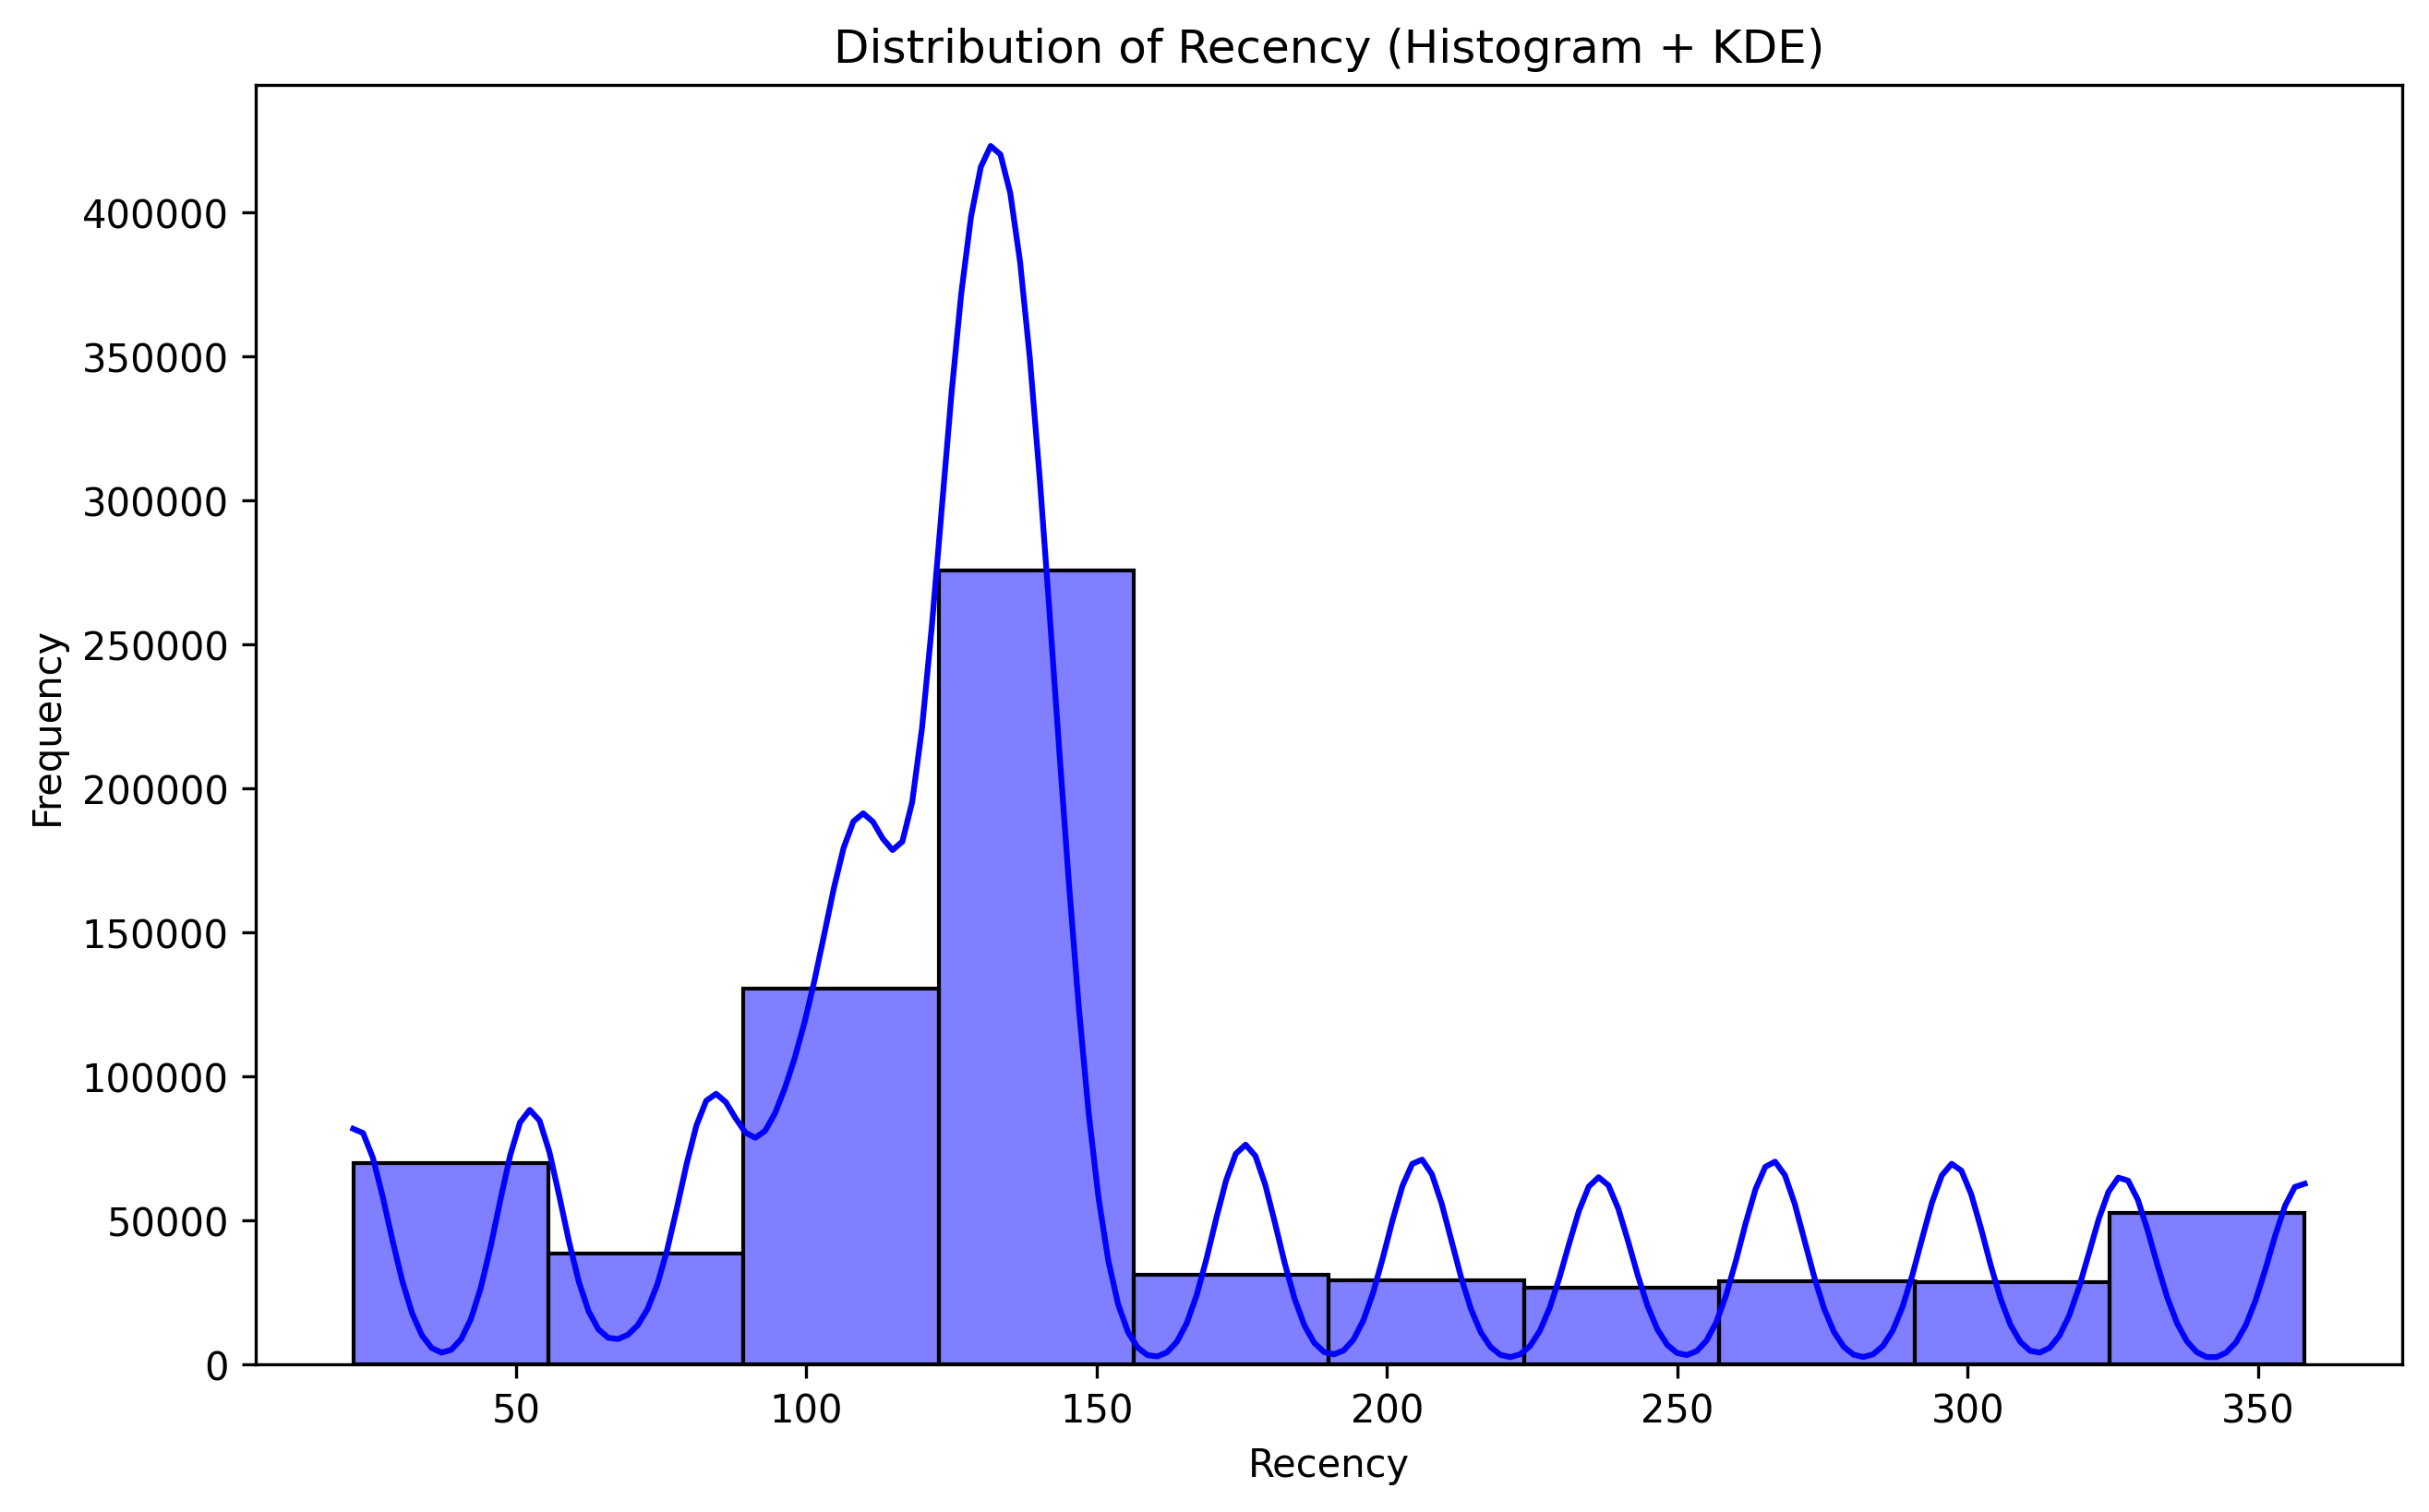

In [ ]:
import scipy.stats as stats

# Recency Histogram + KDE Plot
plt.figure(figsize=(10, 6),dpi=300)
sns.histplot(rfm_data['recency'], kde=True, color='blue', bins=10)
plt.title('Distribution of Recency (Histogram + KDE)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

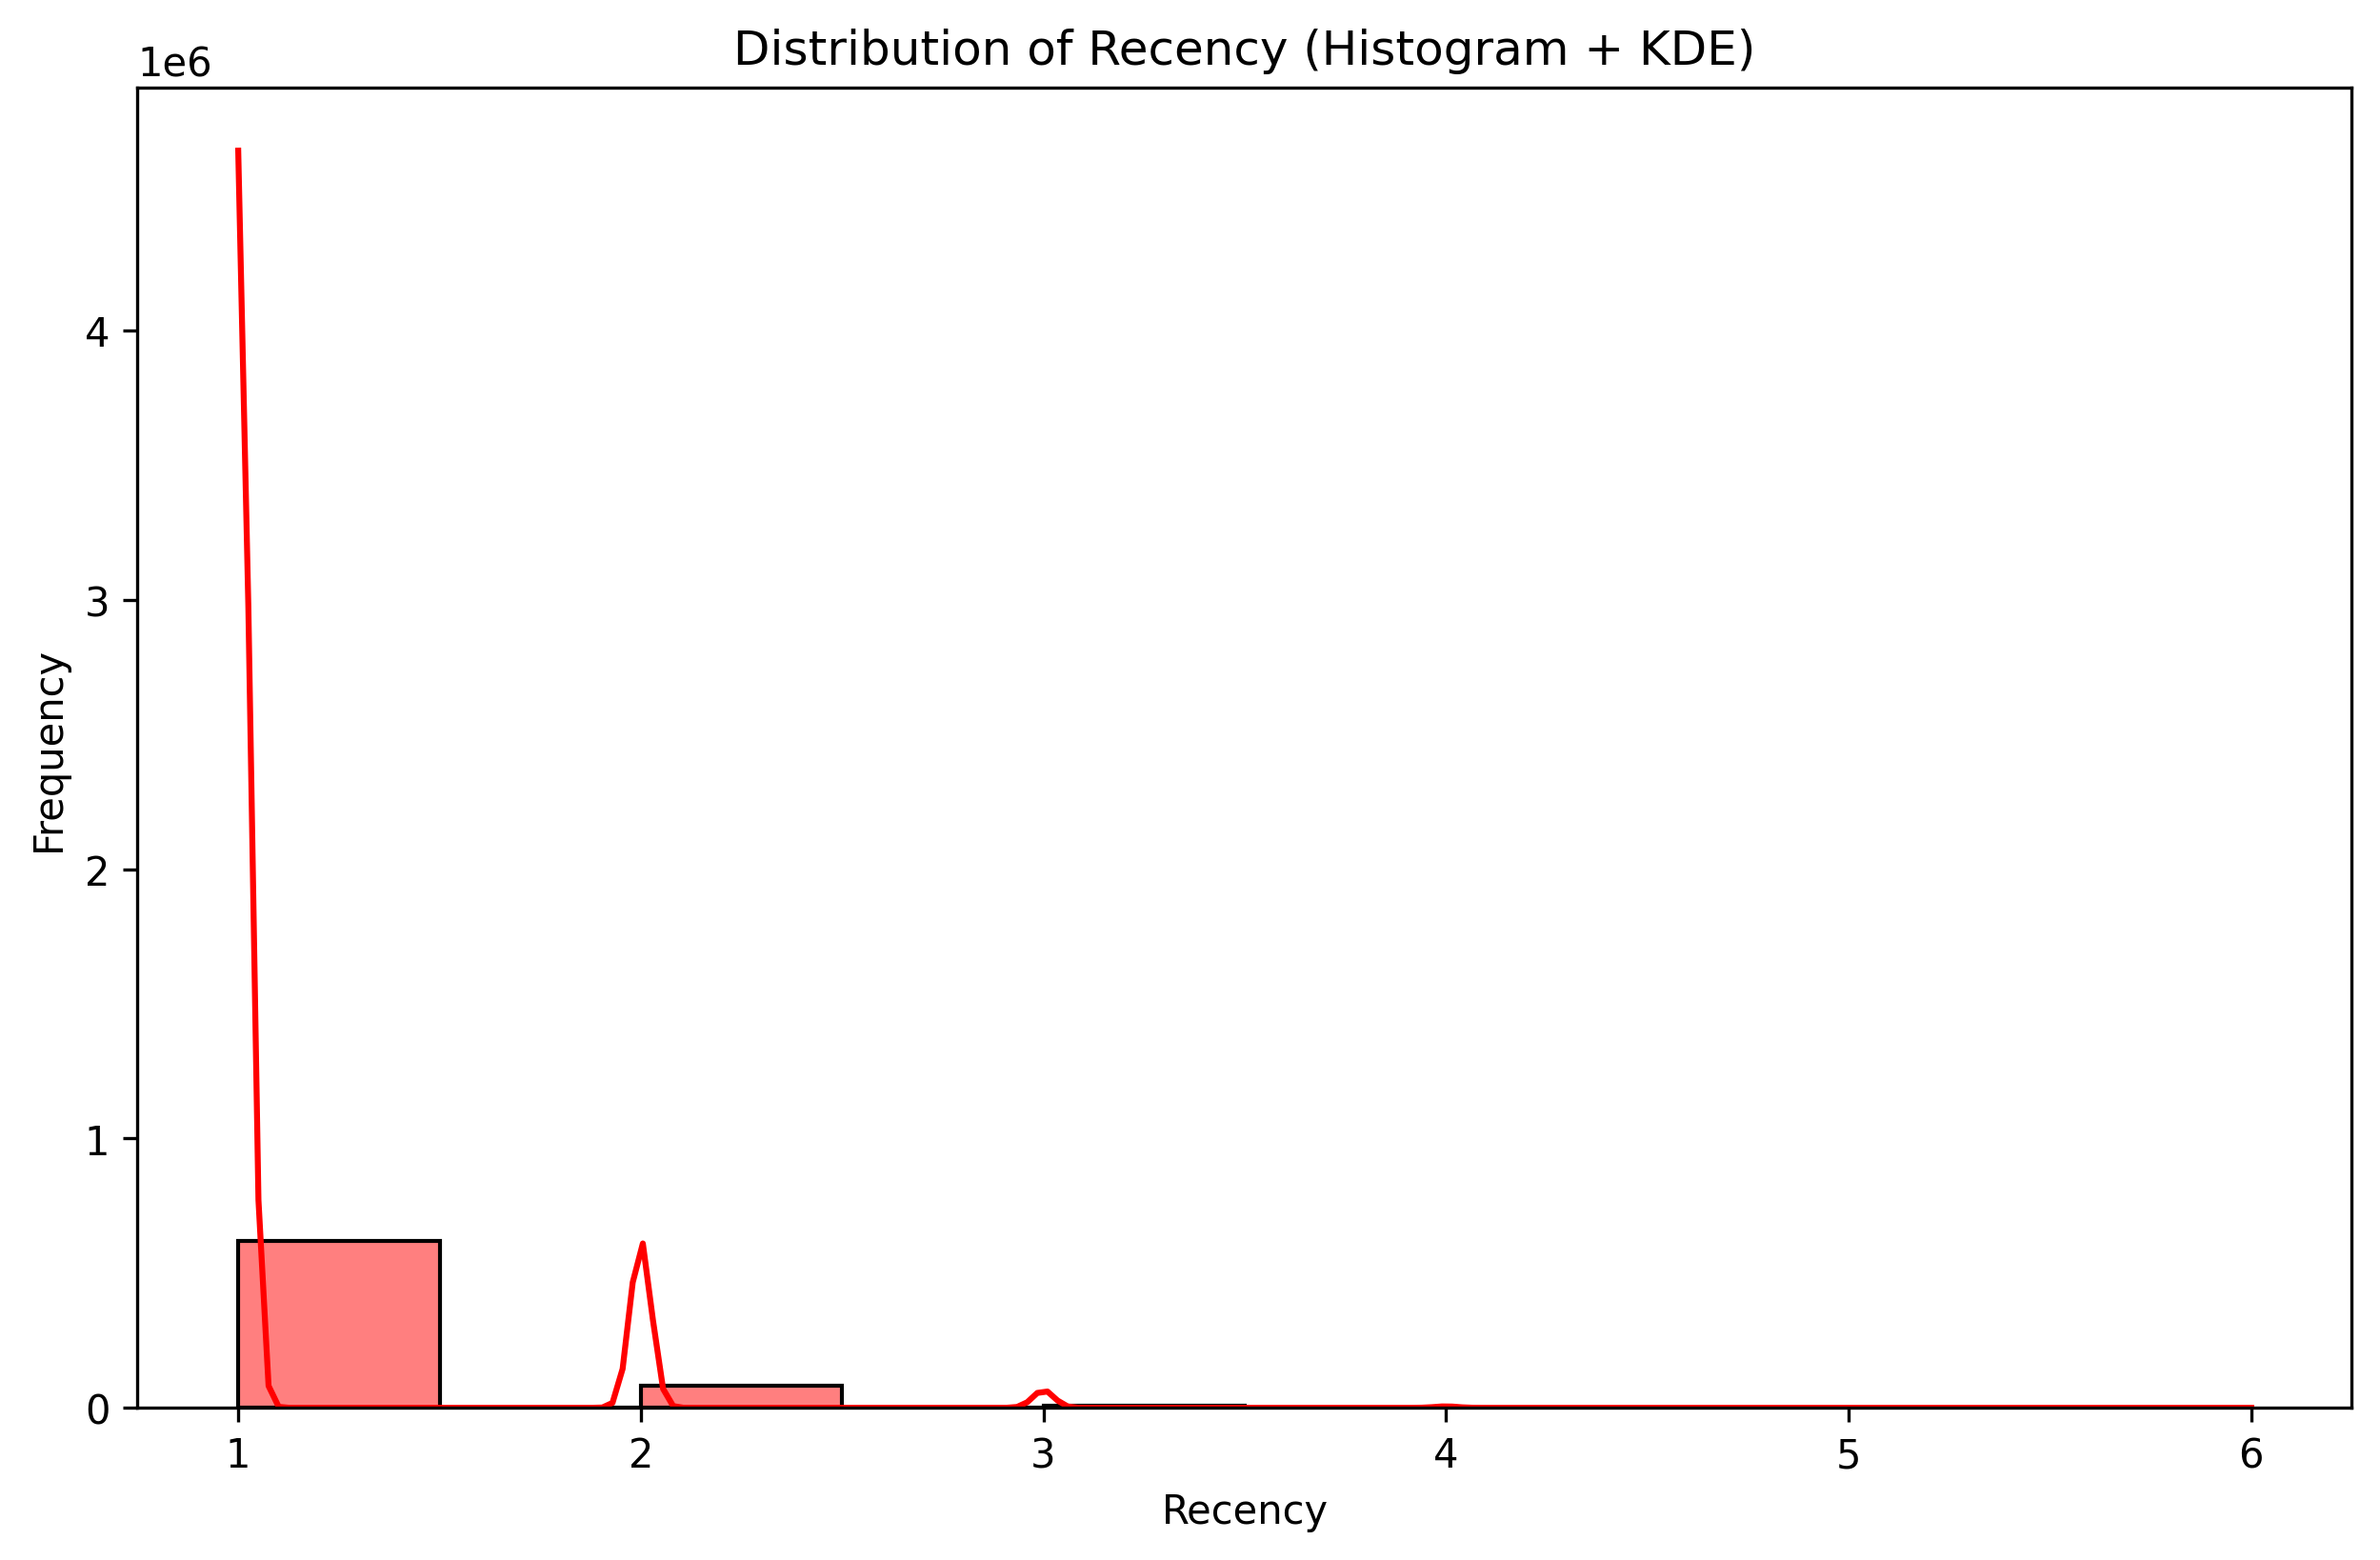

In [ ]:
# Recency Histogram + KDE Plot
plt.figure(figsize=(10, 6),dpi=300)
sns.histplot(rfm_data['frequency'], kde=True, color='red', bins=10)
plt.title('Distribution of Recency (Histogram + KDE)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


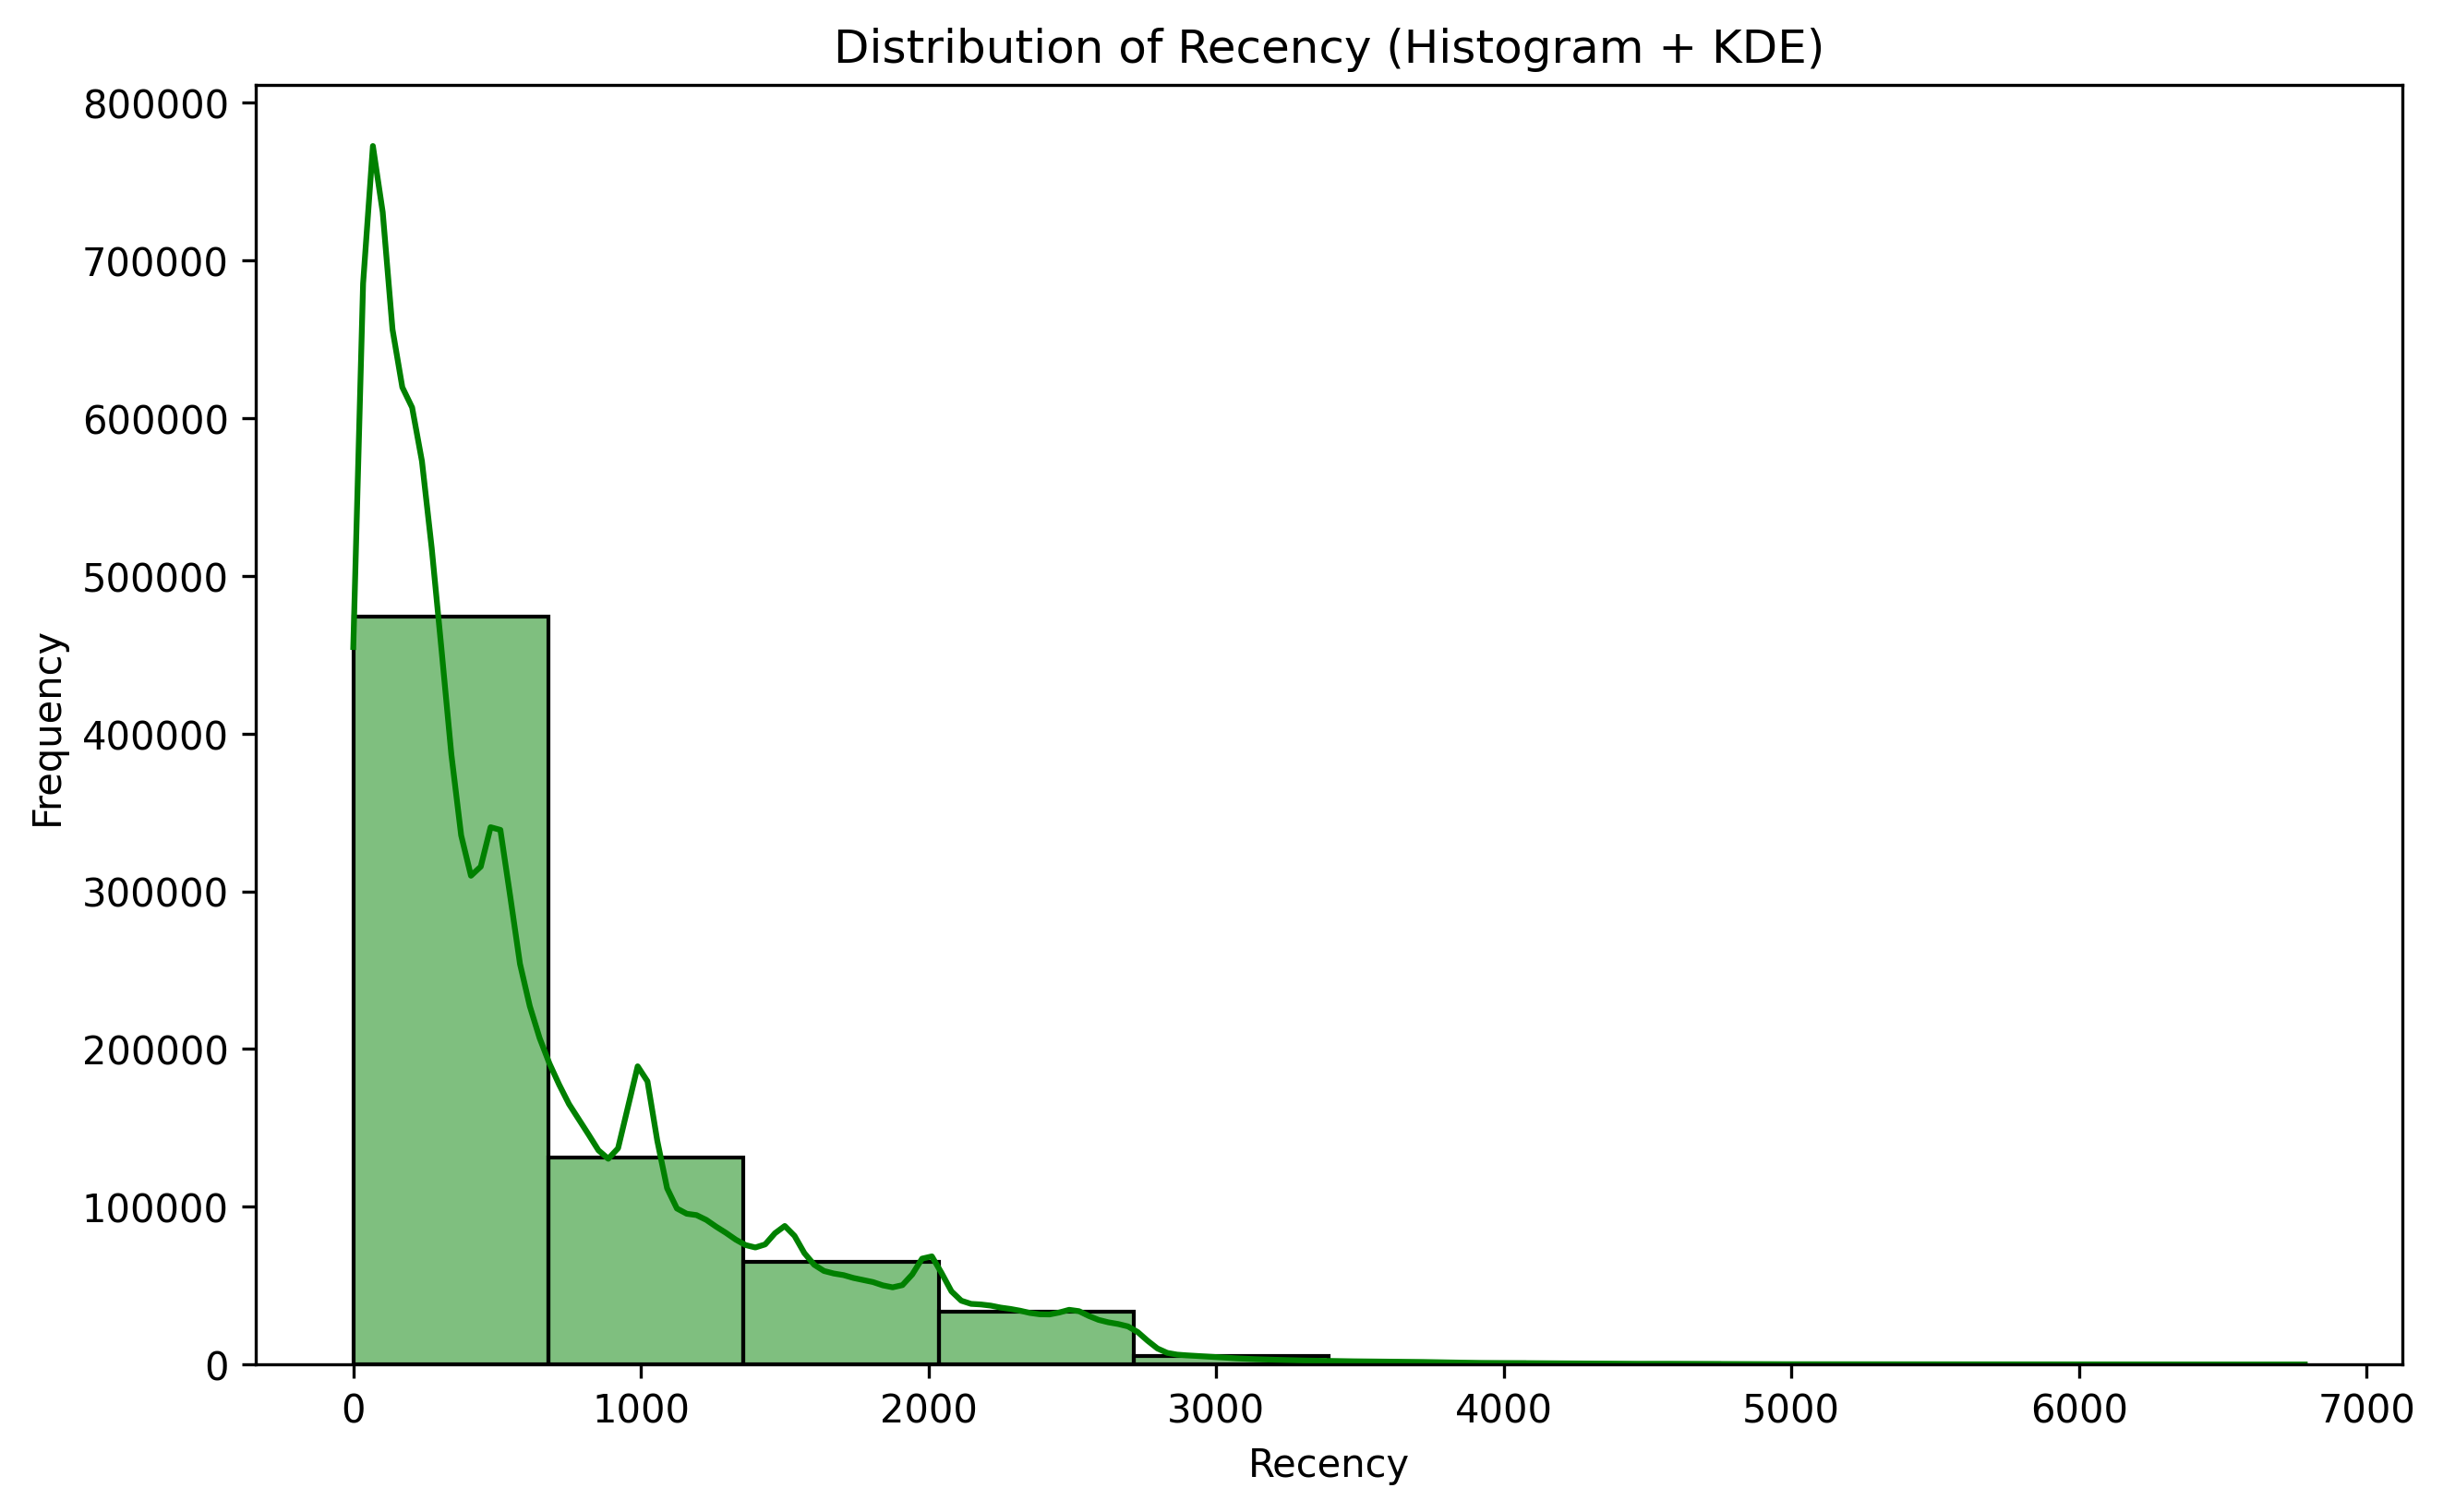

In [ ]:
# Recency Histogram + KDE Plot
plt.figure(figsize=(10, 6),dpi=300)
sns.histplot(rfm_data['monetary'], kde=True, color='green', bins=10)
plt.title('Distribution of Recency (Histogram + KDE)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [ ]:
rfm_data.skew(axis = 0, numeric_only = True)

,0
recency,0.993699
frequency,2.896057
monetary,1.612569


In [ ]:
# Log Transformation for Recency, Frequency, and Monetary
for col in ['recency', 'frequency', 'monetary']:
    rfm_data[f'log_{col}'] = np.log1p(rfm_data[col])  # Apply log transformation


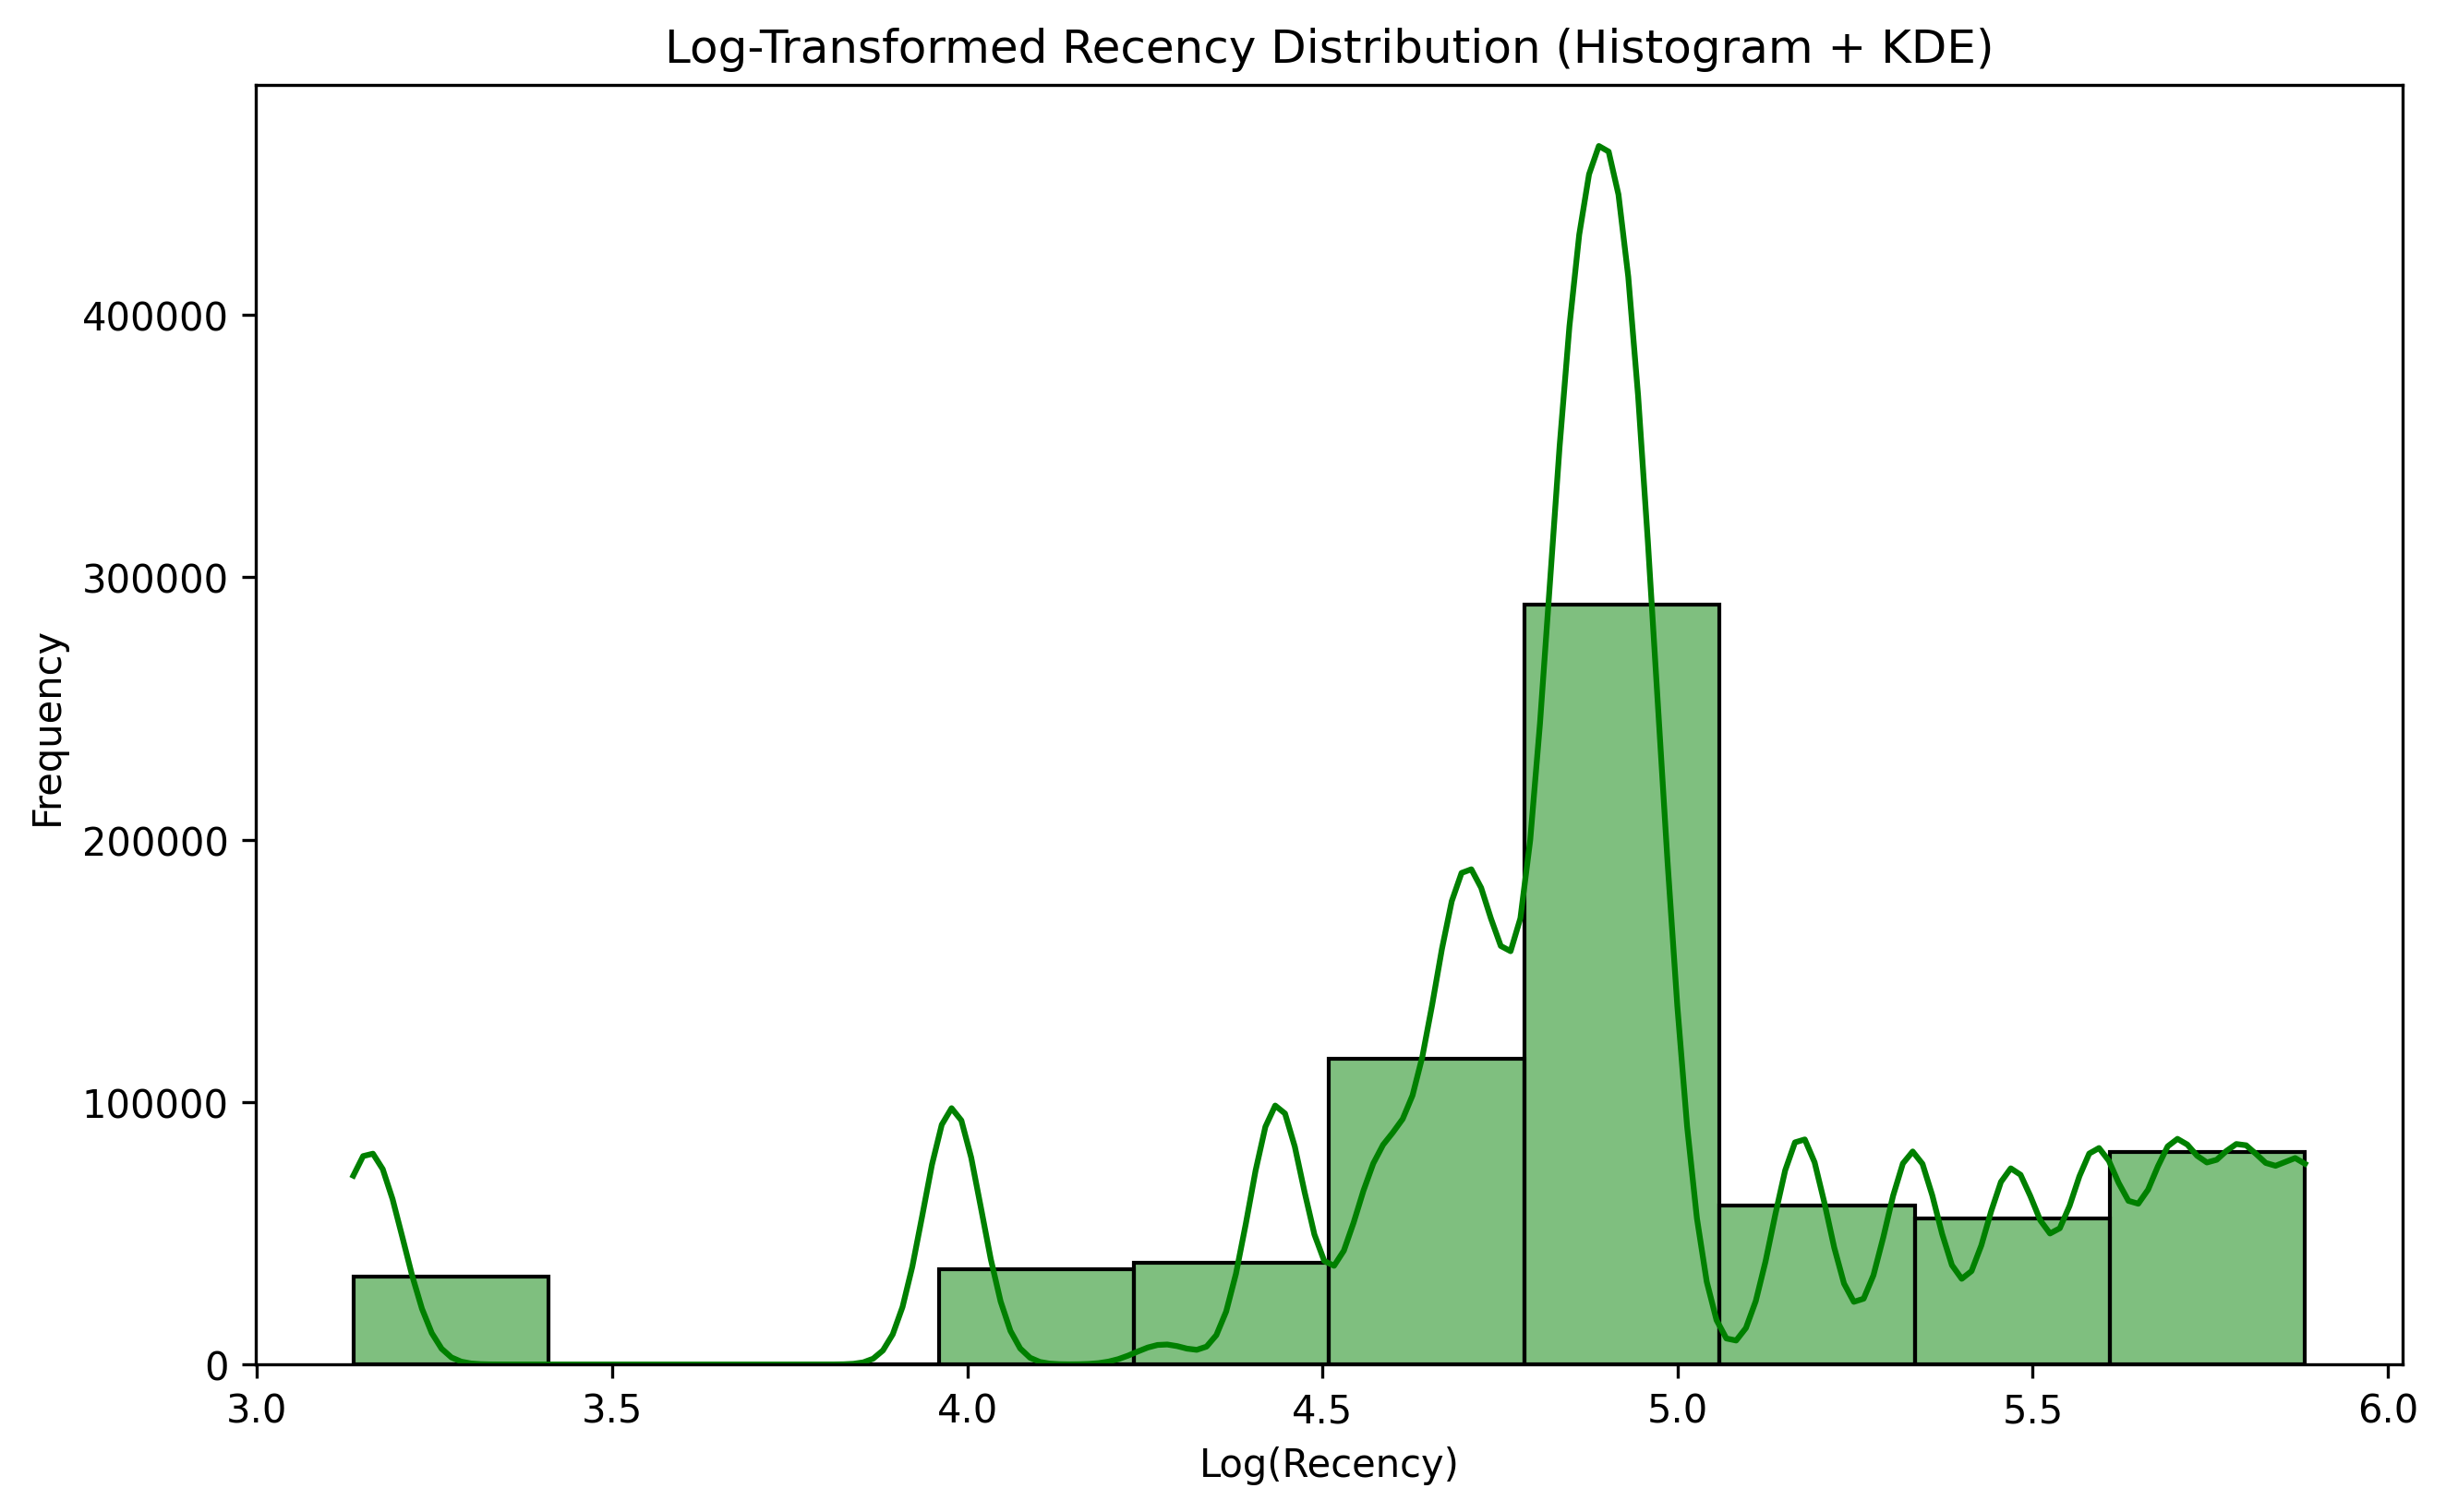

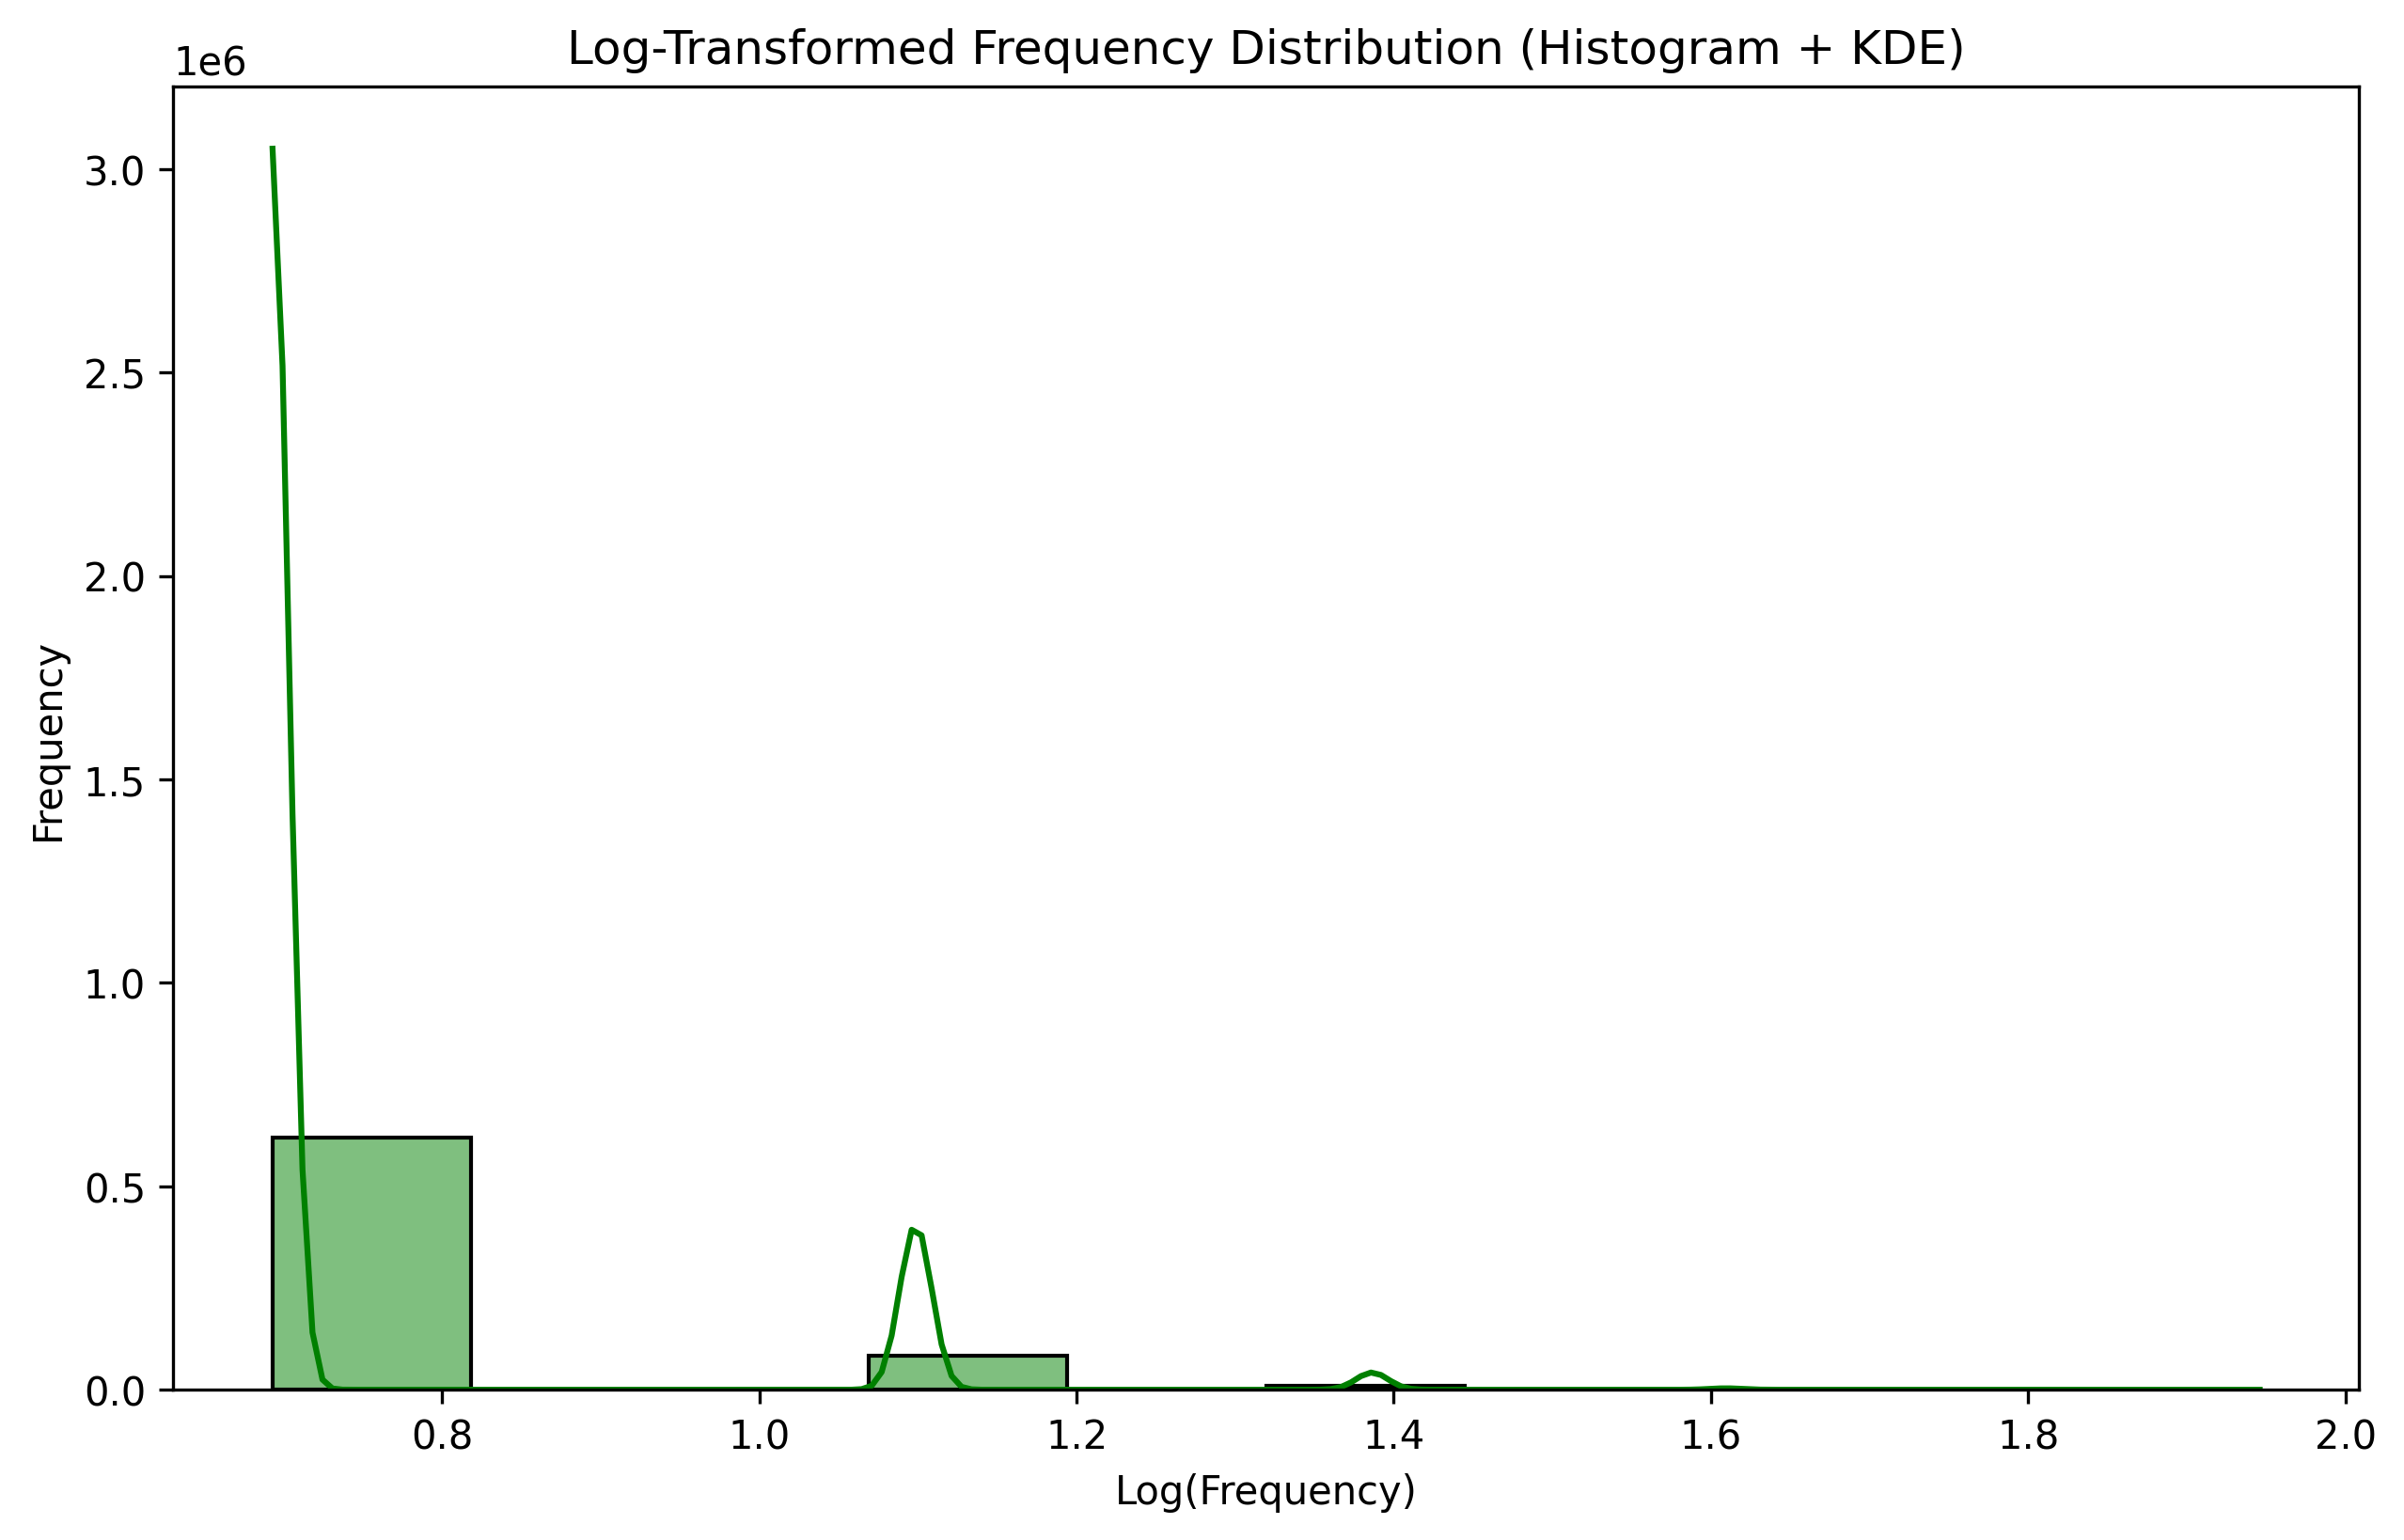

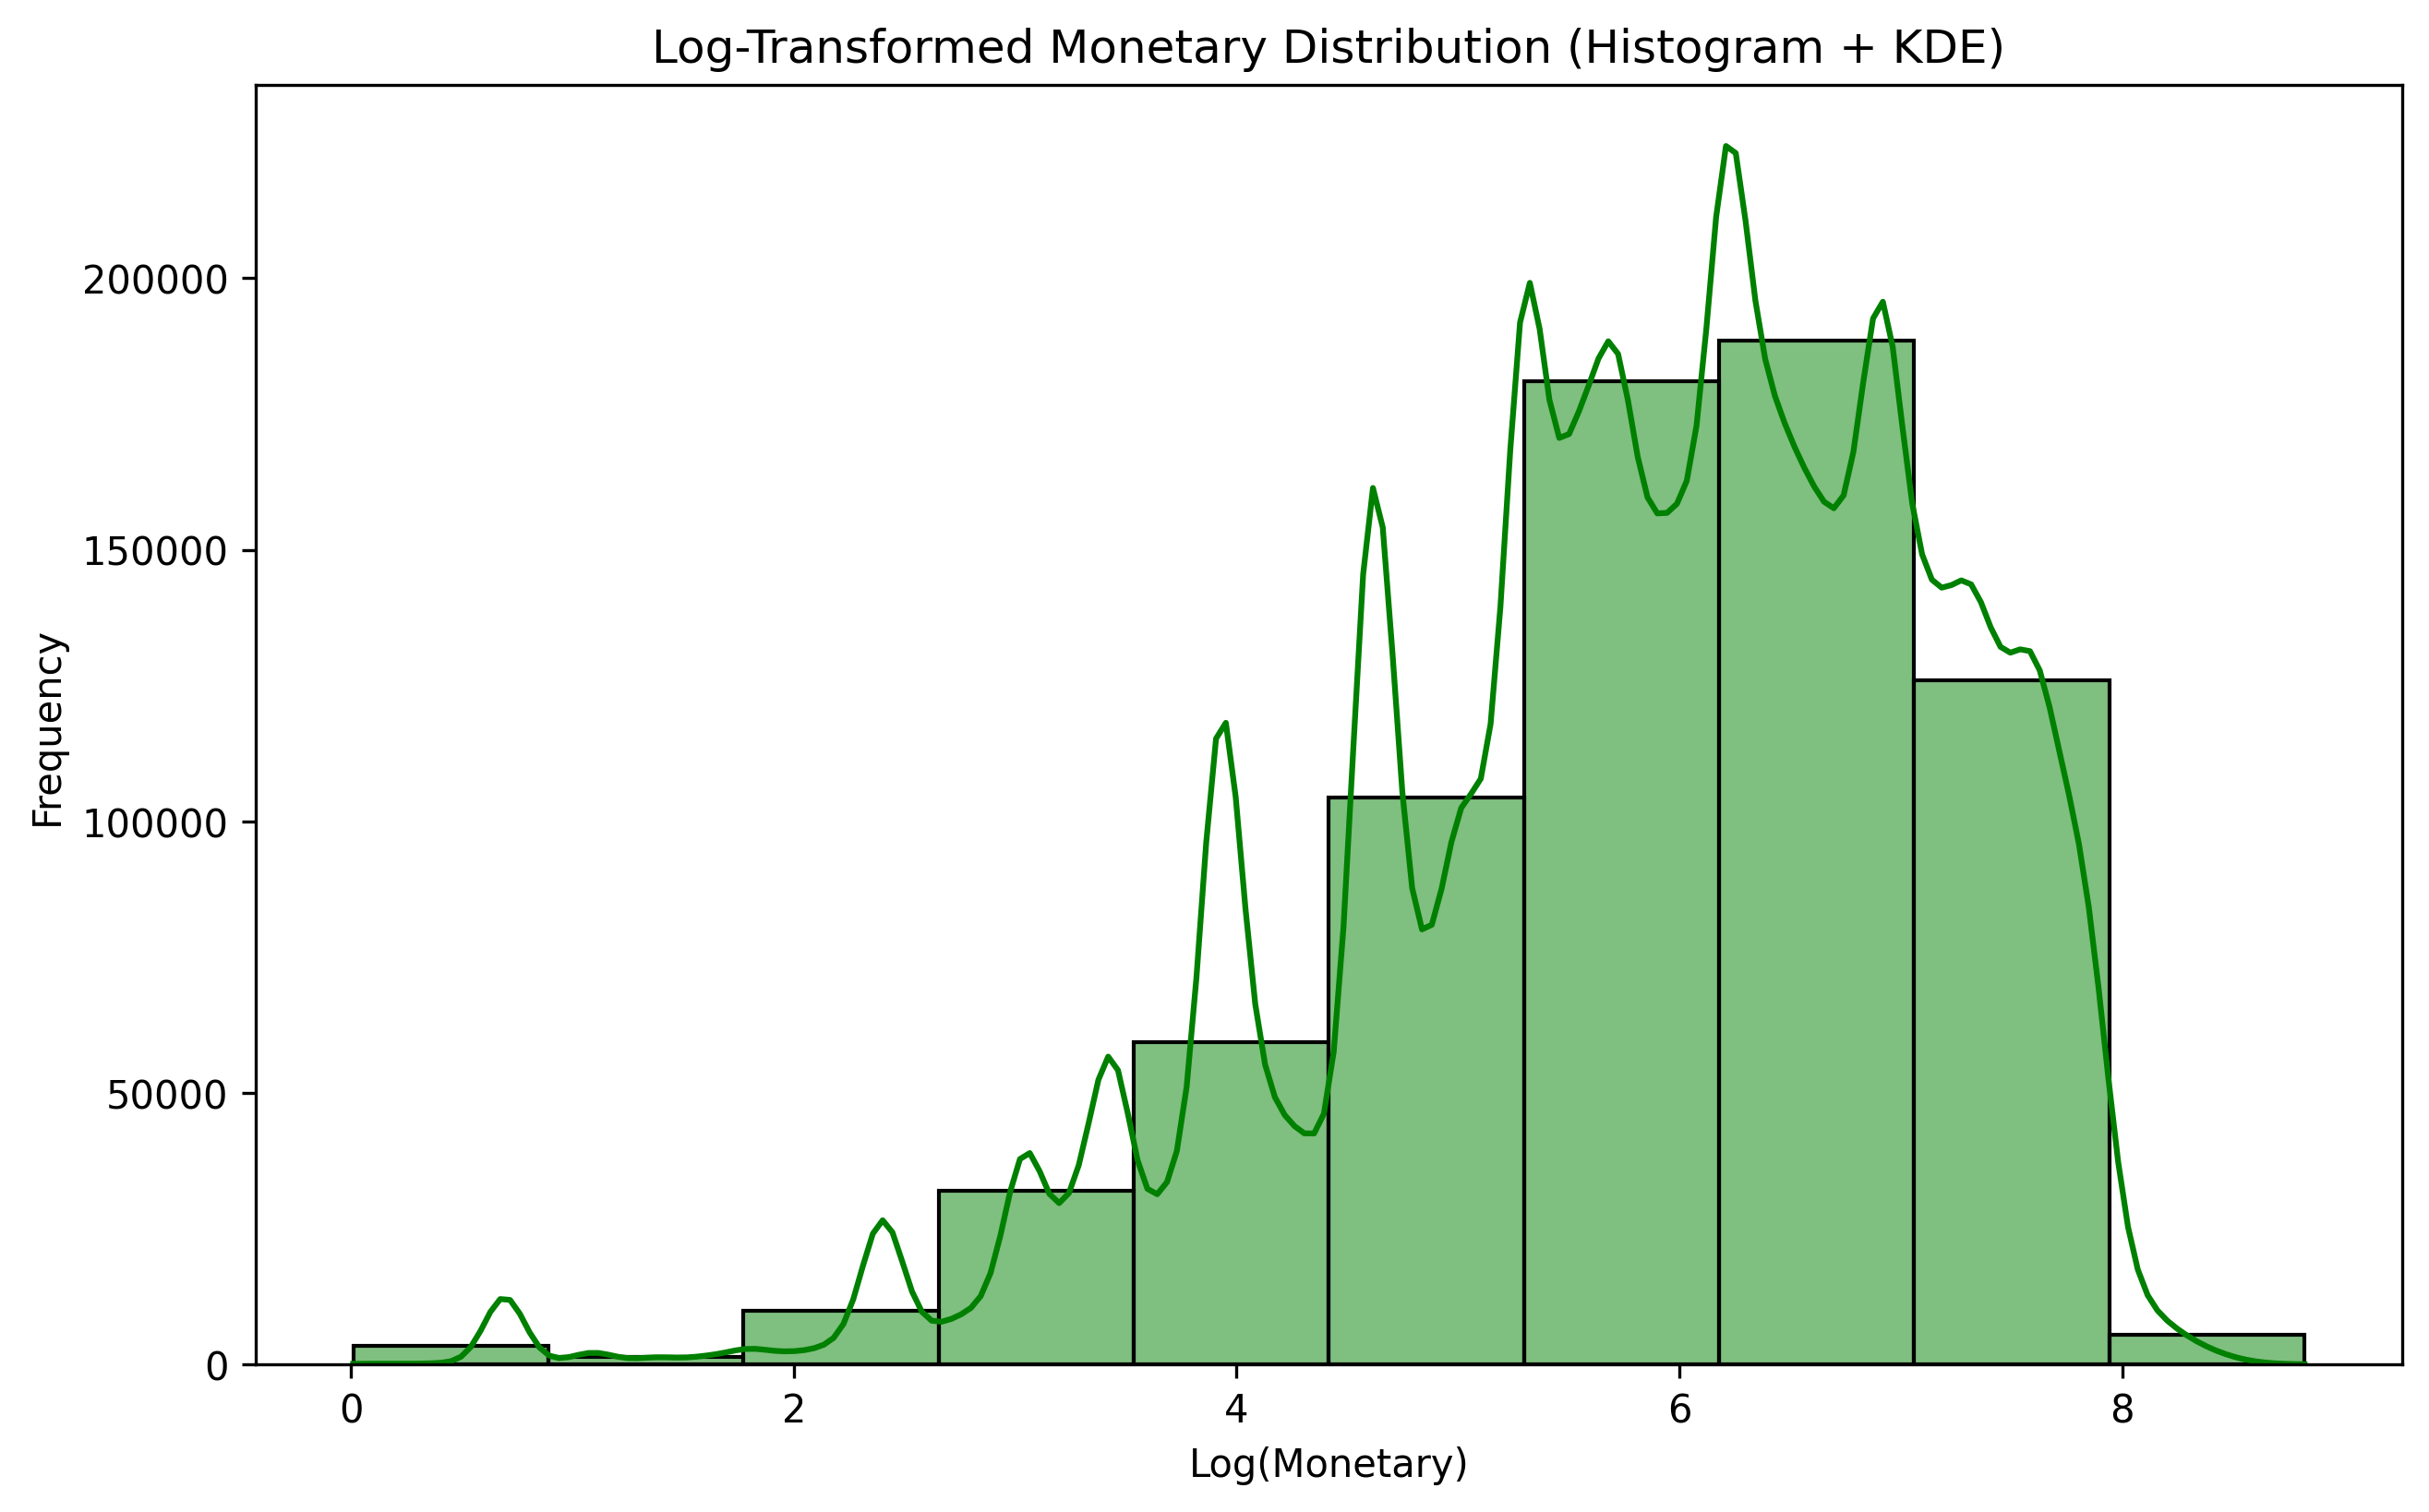

In [ ]:
# Log-Transformed Histograms + KDE
for col in ['recency', 'frequency', 'monetary']:
    plt.figure(figsize=(10, 6), dpi=300)
    sns.histplot(rfm_data[f'log_{col}'], kde=True, bins=10, color='green')
    plt.title(f'Log-Transformed {col.capitalize()} Distribution (Histogram + KDE)')
    plt.xlabel(f'Log({col.capitalize()})')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
rfm_data.skew(axis = 0, numeric_only = True)

,0
recency,0.993699
frequency,2.896057
monetary,1.612569
log_recency,-0.889852
log_frequency,2.531610
log_monetary,-0.721287


In [ ]:
rfm_data1 = rfm_data.copy ()
rfm_data1.head()

,CustomerID,recency,frequency,monetary,log_recency,log_frequency,log_monetary
0,C1010011,114.0,1,356.0,4.744932,0.693147,5.877736
1,C1010012,139.0,1,1499.0,4.941642,0.693147,7.313220
2,C1010014,176.0,2,1455.0,5.176150,1.098612,7.283448
3,C1010018,107.0,1,30.0,4.682131,0.693147,3.433987
4,C1010028,124.0,1,557.0,4.828314,0.693147,6.324359


**Customer Segmentation with K-Means**

In [ ]:
rfm_data1.drop(columns=['CustomerID', 'recency','frequency','monetary'], inplace=True)

In [ ]:
rfm_data1

,log_recency,log_frequency,log_monetary
0,4.744932,0.693147,5.877736
1,4.941642,0.693147,7.313220
2,5.176150,1.098612,7.283448
3,4.682131,0.693147,3.433987
4,4.828314,0.693147,6.324359
...,...,...,...
711596,5.176150,0.693147,6.539586
711597,4.682131,0.693147,5.407172
711598,4.912655,0.693147,4.844187
711599,4.836282,0.693147,3.931826


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select RFM columns for scaling
rfm_data2 = rfm_data1[['log_recency', 'log_frequency', 'log_monetary']]

# Normalize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data2)

# Convert to DataFrame for better readability
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['log_recency', 'log_frequency', 'log_monetary'])

In [ ]:
# Check the new mean and standard deviation after standardization
print(rfm_scaled_df[['log_recency', 'log_frequency', 'log_monetary']].mean())
print(rfm_scaled_df[['log_recency', 'log_frequency', 'log_monetary']].std())

log_recency     -3.211976e-15
log_frequency   -1.146732e-15
log_monetary    -4.362902e-16
dtype: float64
log_recency      1.000001
log_frequency    1.000001
log_monetary     1.000001
dtype: float64


<ipython-input-50-4873445e946a>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', color='blue')


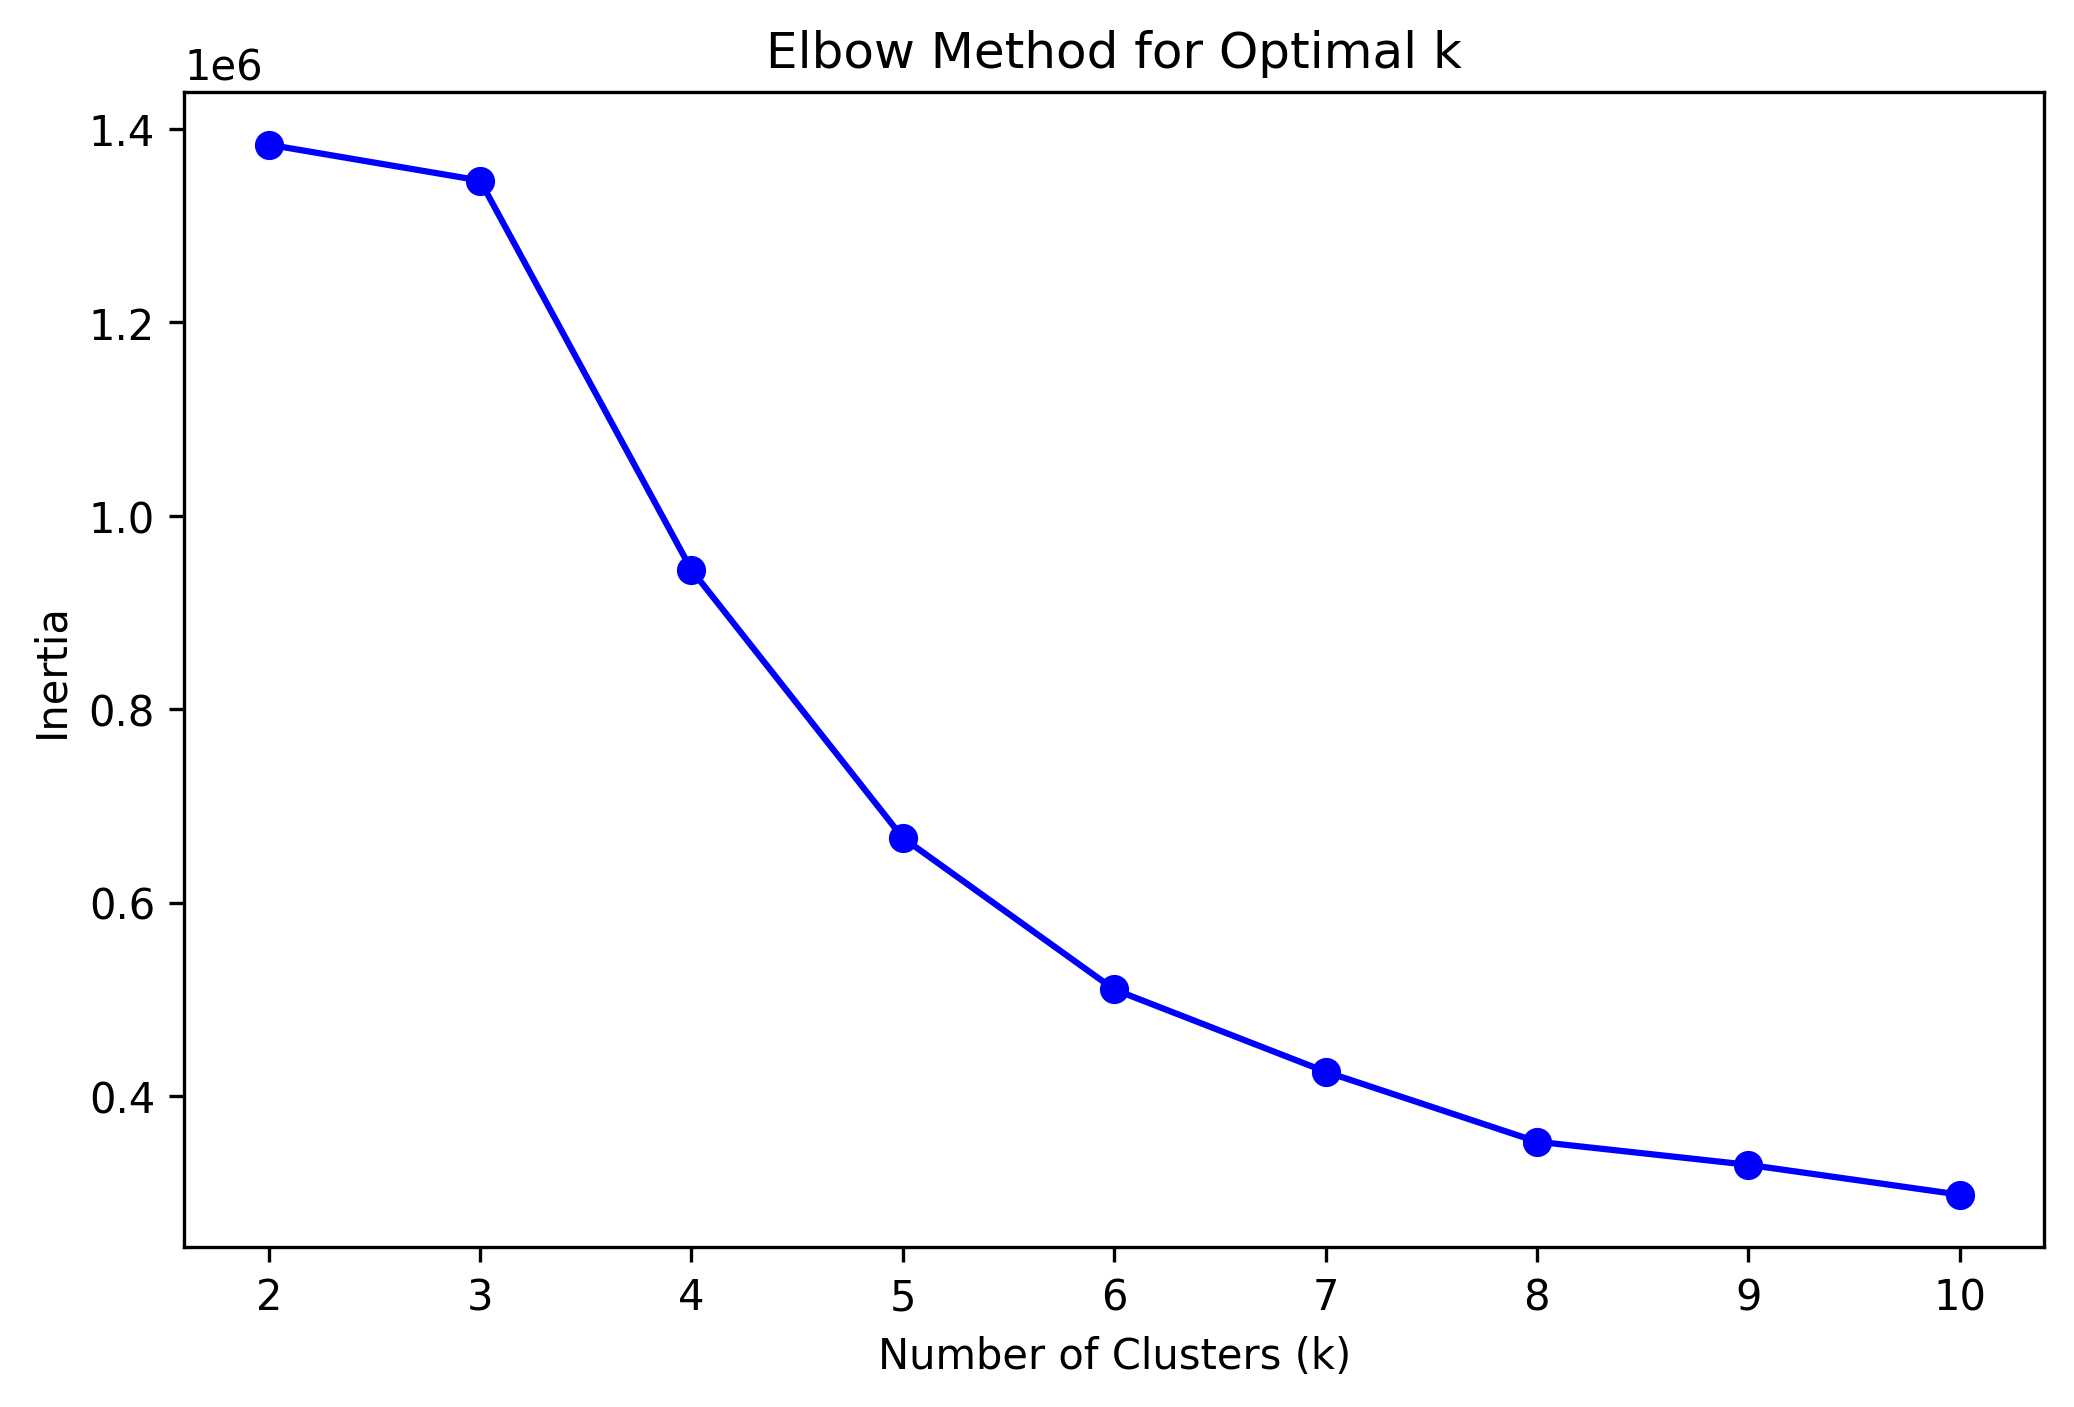

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(2, 11)  # Test k values from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(K, inertia, 'bo-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.show()

In [ ]:
# Use the optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(rfm_scaled)


KMeans(n_clusters=4, random_state=42)

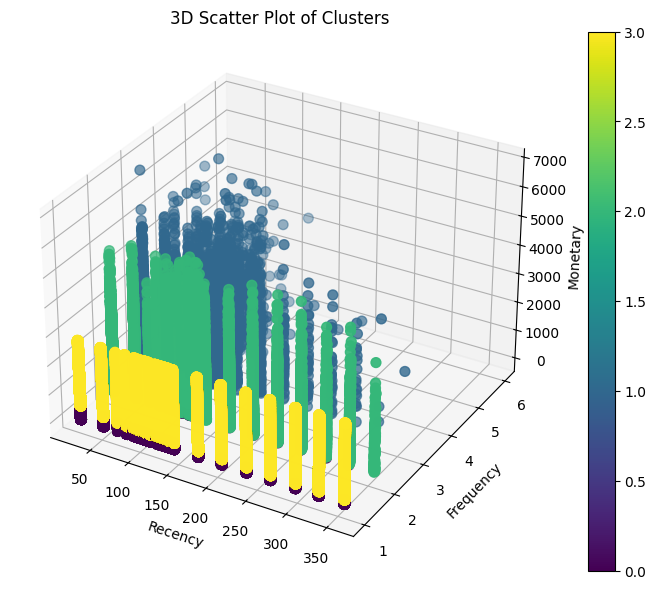

In [ ]:
# 3D Scatter plot
from mpl_toolkits.mplot3d import Axes3D

rfm_analysis = rfm_data.copy()

# Add cluster labels to the DataFrame
rfm_analysis['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm_analysis['recency'], rfm_analysis['frequency'], rfm_analysis['monetary'],
                     c=rfm_analysis['Cluster'], cmap='viridis', s=50)

ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.colorbar(scatter)
plt.show()

**Review of Results**

In [69]:
# Find the top 5 locations by transaction count
top_locations = df5['CustLocation'].value_counts().head(5).index

rfm_top_locations = df5[df5['CustLocation'].isin(top_locations)]
print("Top 5 Locations:")

print(df5['CustLocation'].value_counts().head(5))

# Merge rfm_analysis with the original DataFrame (df5) to get 'CustLocation'
rfm_analysis = pd.merge(rfm_analysis, df5[['CustomerID', 'CustLocation']], on='CustomerID', how='left')

# Now you can group by 'CustLocation' and 'Cluster'
location_clus_df = rfm_analysis.groupby(['CustLocation', 'Cluster']).agg(
    transactions=('CustomerID', 'count'),  # Number of transactions per cluster and location
    avg_recency=('recency', 'mean'),
    avg_frequency=('frequency', 'mean'),
    avg_monetary=('monetary', 'mean')
).reset_index()

# Filter location_clus_df for only the top 5 locations
top5_location_data = location_clus_df[location_clus_df['CustLocation'].isin(top_locations)]

# You can now analyze top5_location_data to see cluster distributions within the top 5 locations
print("\nCluster Distribution within Top 5 Locations:")
print(top5_location_data)

Top 5 Locations:
CustLocation
MUMBAI       78933
BANGALORE    66124
NEW DELHI    59882
GURGAON      58002
DELHI        55728
Name: count, dtype: int64

Cluster Distribution within Top 5 Locations:
      CustLocation  Cluster  transactions  avg_recency  avg_frequency  \
1417     BANGALORE        0         17007   139.169342       1.000470   
1418     BANGALORE        1         22997    97.808105       3.185763   
1419     BANGALORE        2         53858   115.720172       2.000000   
1420     BANGALORE        3         33309   172.086253       1.000000   
3946         DELHI        0         16196   143.036429       1.000494   
3947         DELHI        1         18938    95.912821       3.196958   
3948         DELHI        2         45403   114.050063       2.000000   
3949         DELHI        3         26296   166.410138       1.000000   
5843       GURGAON        0         15692   143.664989       1.000255   
5844       GURGAON        1         20516    94.016719       3.208813   


In [70]:
max_transaction_clust = top5_location_data.loc[
    top5_location_data.groupby('CustLocation')['transactions'].idxmax()
]

max_transaction_clust_sorted = max_transaction_clust.sort_values('transactions', ascending=False)

In [72]:
clust_profile = rfm_analysis.groupby('Cluster')[['recency', 'frequency', 'monetary']].mean()
print(clust_profile)

            recency  frequency     monetary
Cluster                                    
0        142.858651   1.000874   105.124983
1         95.861031   3.199697  1796.737956
2        114.561239   2.000000  1129.731757
3        168.094945   1.000000   850.078977


In [75]:
# Assign labels to clusters based on the profile
clust_labels = {
    0: "Occasional Customers",
    1: "Loyal Customers",
    2: "Dormant Customers",
    3: "Lost Customers"
}

rfm_analysis['ClusterLabel'] = rfm_analysis['Cluster'].map(clust_labels)

# Display the DataFrame with cluster labels
print(rfm_analysis)

        CustomerID  recency  frequency  monetary  log_recency  log_frequency  \
0         C1010011    114.0          1     356.0     4.744932       0.693147   
1         C1010012    139.0          1    1499.0     4.941642       0.693147   
2         C1010014    176.0          2    1455.0     5.176150       1.098612   
3         C1010014    176.0          2    1455.0     5.176150       1.098612   
4         C1010014    176.0          2    1455.0     5.176150       1.098612   
...            ...      ...        ...       ...          ...            ...   
1564328   C9099836    176.0          1     691.0     5.176150       0.693147   
1564329   C9099877    107.0          1     222.0     4.682131       0.693147   
1564330   C9099919    135.0          1     126.0     4.912655       0.693147   
1564331   C9099941    125.0          1      50.0     4.836282       0.693147   
1564332   C9099956     97.0          1     855.0     4.584967       0.693147   

         log_monetary  Cluster CustLoca